<a href="https://colab.research.google.com/github/ritaxtii/imageProcessing/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 71.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

In [4]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [6]:
image = cv2.imread("/content/tii.jpg")
#image = cv2.imread("/content/women.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(171,257))
print(image.shape)

(257, 171, 3)


In [7]:
Reduce_factors = [2,4,5,7,8,10,15]
#Reduce_factors = [2,7,15]
Scale_factors = []

for i in Reduce_factors:
  Scale_factors.append(1/i)

inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]



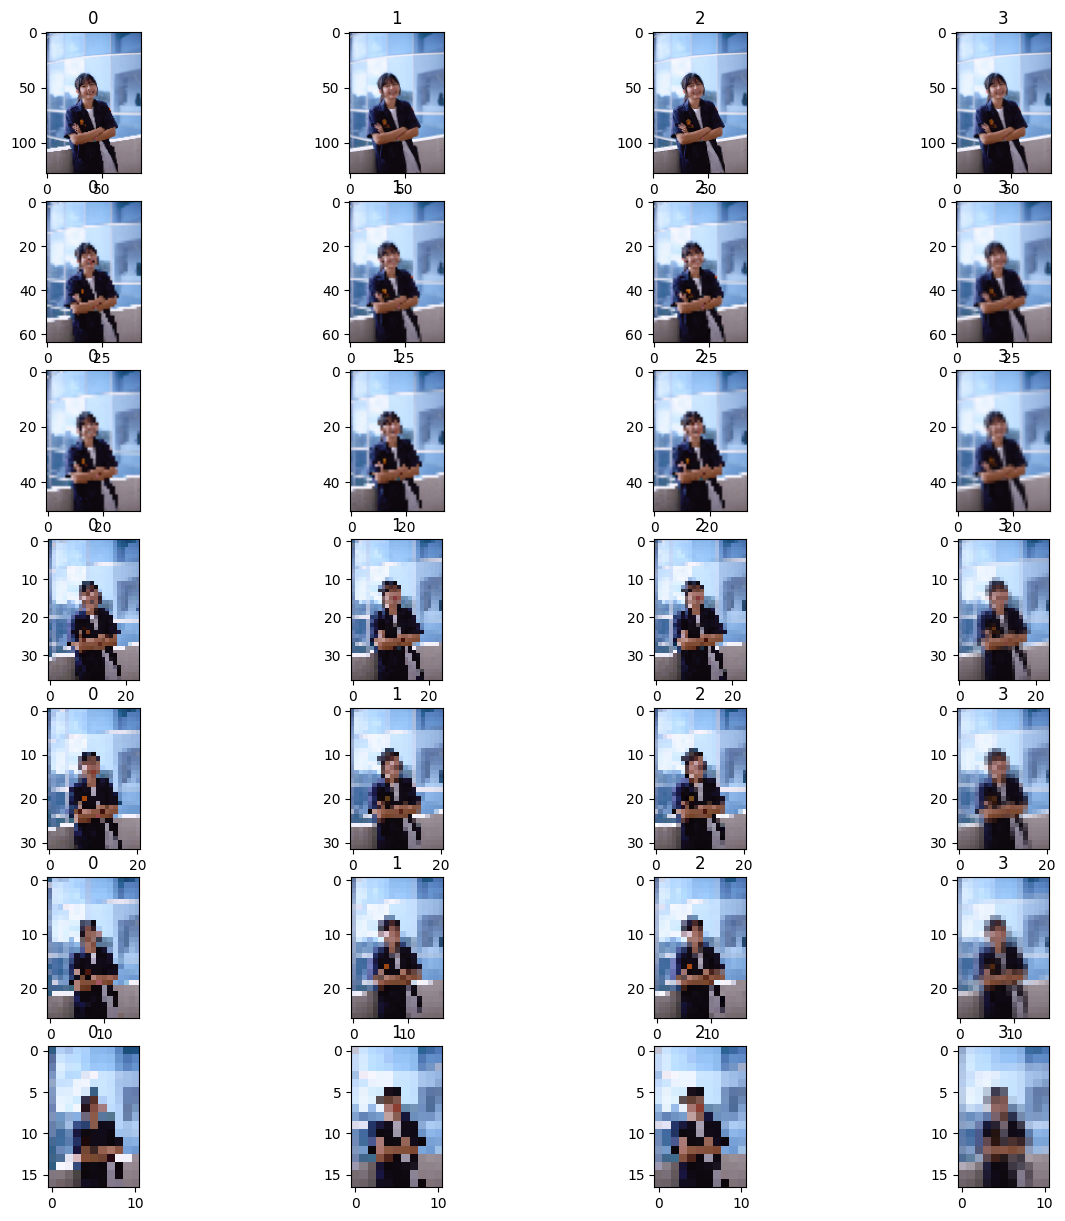

In [8]:
i=1
plt.figure(figsize=(15, 15))
for scale_factor in Scale_factors:
  for interp_method in inter_methods:
    # Resize the image
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=interp_method)

    # Display the scaled image
    plt.subplot(7, 4, i)
    plt.imshow(scaled_image)
    plt.title(interp_method)
    i=i+1
plt.show()


In [9]:
def add_gaussian_noise(image):
  noise_mean = 0
  noise_std = 10
  noise_factor = 3
  noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
  return noisy_image

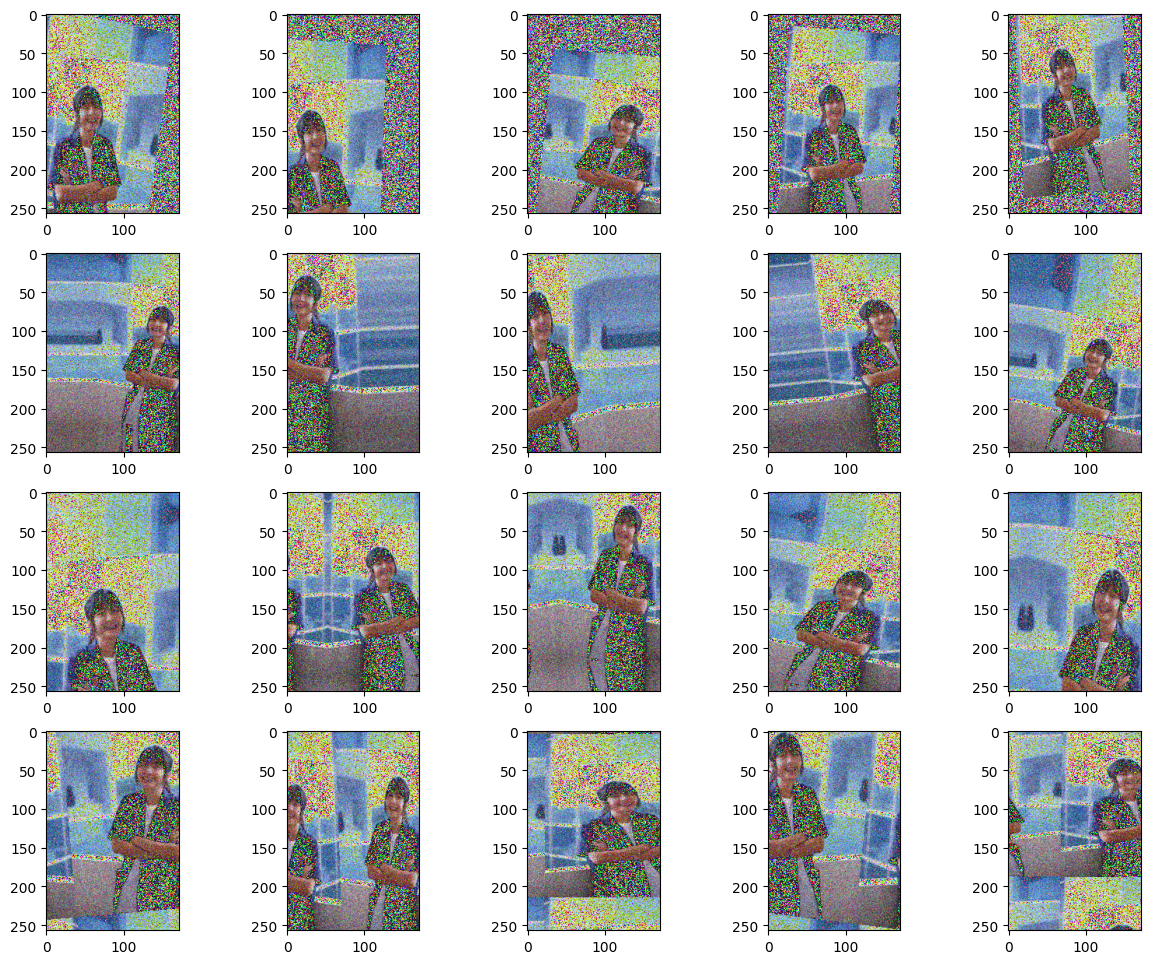

In [10]:
fill_mode = ['constant', 'nearest', 'reflect', 'wrap']
generate_pic = []
for m in fill_mode:
  datagen = ImageDataGenerator(rotation_range= 10,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                shear_range=0.3,
                                zoom_range=0.3,
                                horizontal_flip=True,
                                preprocessing_function = add_gaussian_noise,
                                fill_mode = m)
  pic = datagen.flow(np.array([image]), batch_size=1)
  generate_pic.append(pic)
Npic = 5
i=1
plt.figure(figsize=(15, 15))
for pic in generate_pic:
  for j in range(0, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    plt.subplot(5, 5, i)
    plt.imshow(im_result)
    i+=1
plt.show()


In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
print(len(x_train))
print(len(x_val))
print(len(x_test))

4422102/4422102 [==============================] - 0s 0us/step
50000
10000
10000


In [12]:
def add_gaussian_noise(image):
  noise_mean = 0
  noise_std = 0.5
  noise_factor = 0.3
  noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
  return noisy_image

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_gaussian_noise
)

In [14]:
augmented_x_train = []
augmented_x_val = []
augmented_x_test = []
print(x_train.shape)

(50000, 28, 28)


In [15]:
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_train.append(augmented_image)
for image in x_val:
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_val.append(augmented_image)
for image in x_test:
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_test.append(augmented_image)

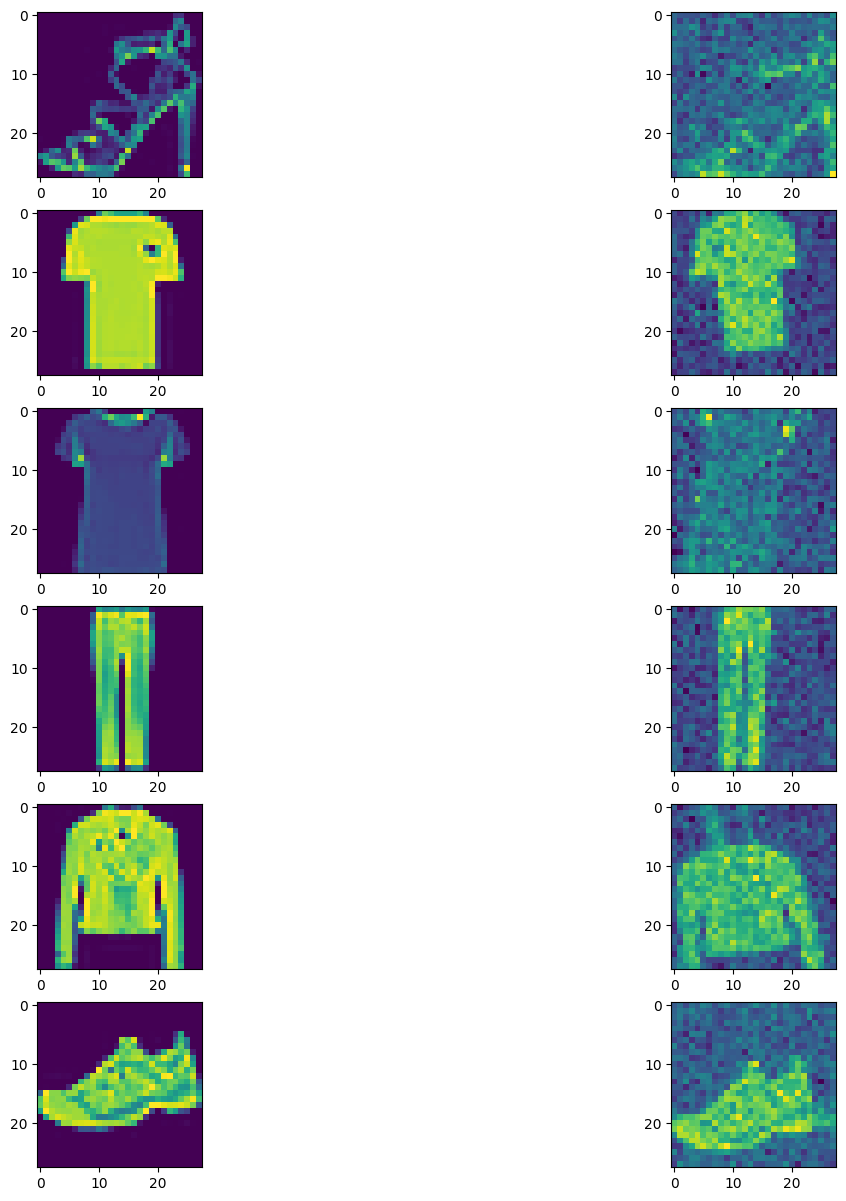

In [16]:
plt.figure(figsize=(15, 15))
for i in range(6):
  plt.subplot(6, 2, (i*2)+1)
  plt.imshow(x_train[i])
  plt.subplot(6, 2, (i*2)+2)
  plt.imshow(augmented_x_train[i])

In [17]:
from keras import Model, Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [18]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)
# Create the Autoencoder model
autoencoder = Model(input_img, x9)
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [19]:
augmented_x_train = np.array(augmented_x_train)
augmented_x_train = np.squeeze(augmented_x_train)
augmented_x_val = np.array(augmented_x_val)
augmented_x_val = np.squeeze(augmented_x_val)
augmented_x_test = np.array(augmented_x_test)
augmented_x_test = np.squeeze(augmented_x_test)
print(augmented_x_train.shape)
print(x_train.shape)

(50000, 28, 28)
(50000, 28, 28)


In [21]:

callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    augmented_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(augmented_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 30s 155ms/step - loss: 0.0603 - val_loss: 0.0579
Epoch 2/70
196/196 [==============================] - 30s 151ms/step - loss: 0.0561 - val_loss: 0.0557
Epoch 3/70
196/196 [==============================] - 31s 156ms/step - loss: 0.0533 - val_loss: 0.0540
Epoch 4/70
196/196 [==============================] - 31s 160ms/step - loss: 0.0514 - val_loss: 0.0506
Epoch 5/70
196/196 [==============================] - 32s 165ms/step - loss: 0.0501 - val_loss: 0.0513
Epoch 6/70
196/196 [==============================] - 33s 166ms/step - loss: 0.0492 - val_loss: 0.0489
Epoch 7/70
196/196 [==============================] - 32s 162ms/step - loss: 0.0485 - val_loss: 0.0498
Epoch 8/70
196/196 [==============================] - 32s 164ms/step - loss: 0.0479 - val_loss: 0.0479
Epoch 9/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0473 - val_loss: 0.0484
Epoch 10/70
196/196 [==============================] - 32s 163ms/step - l

313/313 [==============================] - 3s 7ms/step


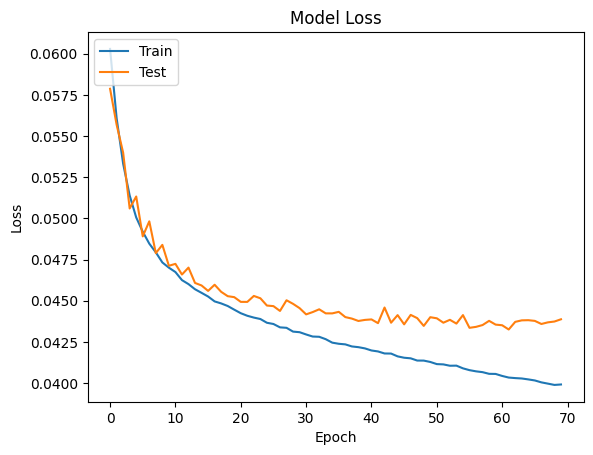

In [22]:
predictions_test2 = autoencoder.predict(augmented_x_test)

# View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


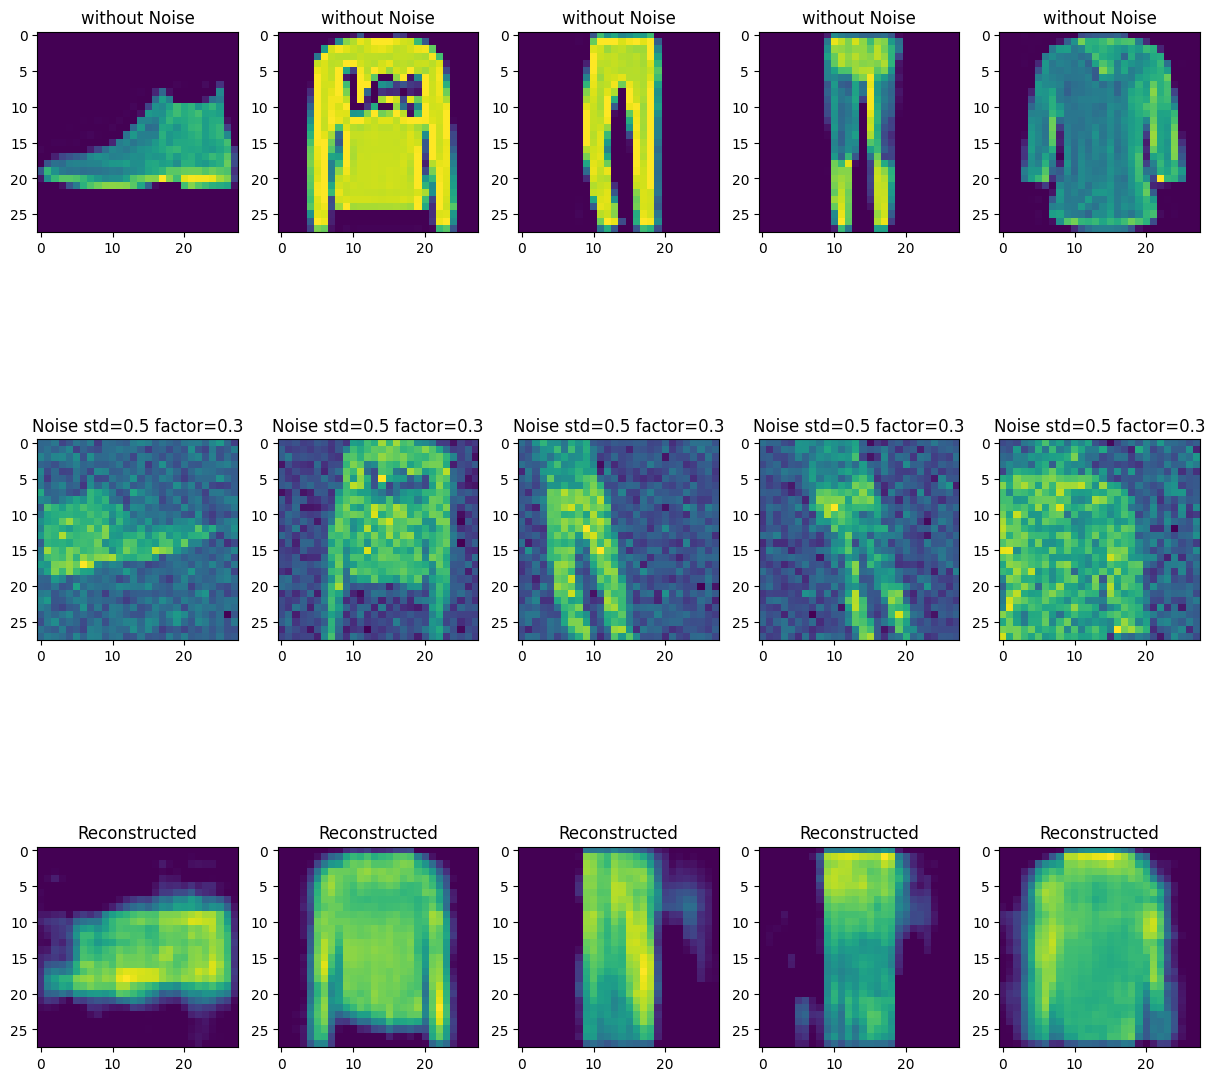

In [23]:
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(augmented_x_test[i])
    plt.title("Noise std=0.5 factor=0.3")
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title("without Noise")
    plt.subplot(3, 5, i + 11)
    plt.imshow(predictions_test2[i])
    plt.title("Reconstructed")
plt.show()

In [25]:
def add_gaussian_noise2(image):
  noise_mean = 0
  noise_std = 0.1
  noise_factor = 0.5
  noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
  return noisy_image

In [26]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_gaussian_noise2
)

In [27]:
augmented_x_train = []
augmented_x_val = []
augmented_x_test = []
print(x_train.shape)

(50000, 28, 28)


In [28]:

for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_train.append(augmented_image)
for image in x_val:
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_val.append(augmented_image)
for image in x_test:
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    augmented_x_test.append(augmented_image)

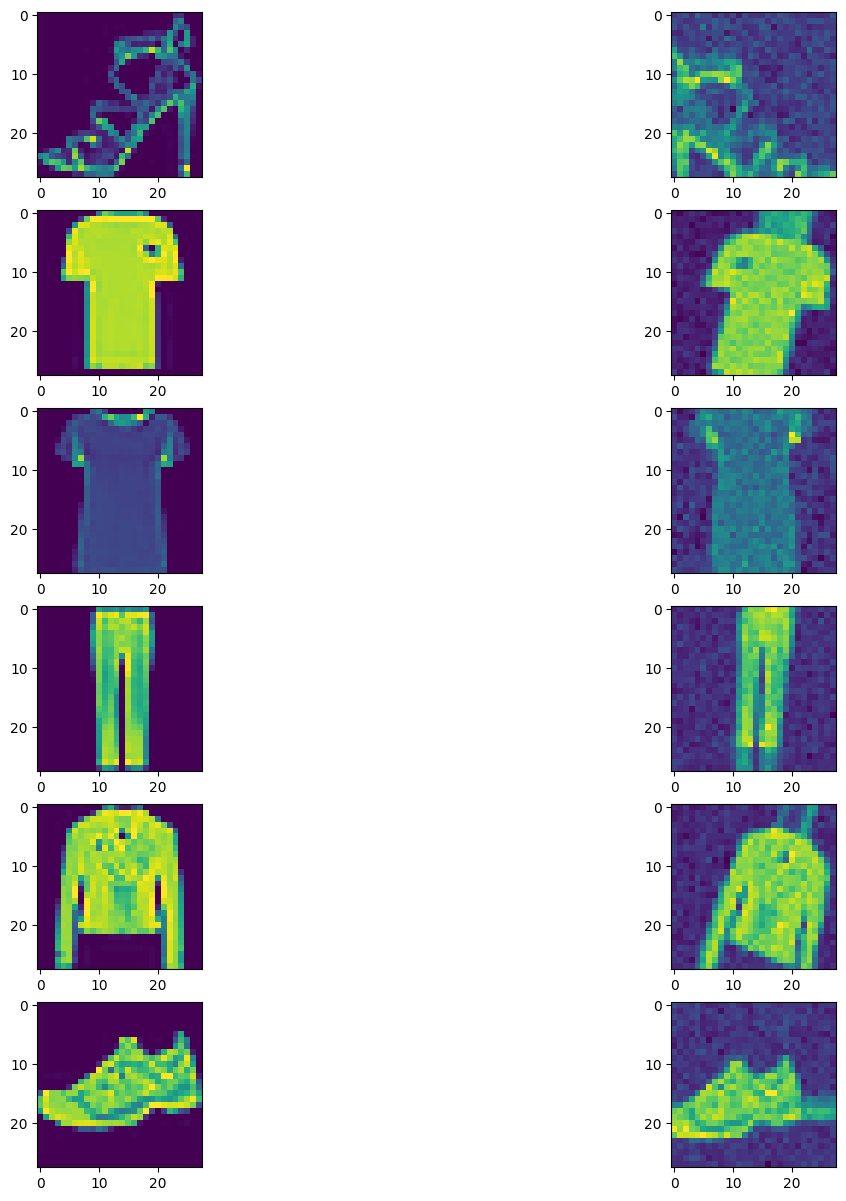

In [29]:

plt.figure(figsize=(15, 15))
for i in range(6):
  plt.subplot(6, 2, (i*2)+1)
  plt.imshow(x_train[i])
  plt.subplot(6, 2, (i*2)+2)
  plt.imshow(augmented_x_train[i])

In [30]:

input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)
# Create the Autoencoder model
autoencoder = Model(input_img, x9)
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 256)       2560      
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [31]:

augmented_x_train = np.array(augmented_x_train)
augmented_x_train = np.squeeze(augmented_x_train)
augmented_x_val = np.array(augmented_x_val)
augmented_x_val = np.squeeze(augmented_x_val)
augmented_x_test = np.array(augmented_x_test)
augmented_x_test = np.squeeze(augmented_x_test)
print(augmented_x_train.shape)
print(x_train.shape)

(50000, 28, 28)
(50000, 28, 28)


In [32]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    augmented_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(augmented_x_val, x_val),
    callbacks=[callback],
)


Epoch 1/70
196/196 [==============================] - 31s 156ms/step - loss: 0.0734 - val_loss: 0.0621
Epoch 2/70
196/196 [==============================] - 32s 165ms/step - loss: 0.0584 - val_loss: 0.0559
Epoch 3/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0542 - val_loss: 0.0527
Epoch 4/70
196/196 [==============================] - 32s 165ms/step - loss: 0.0513 - val_loss: 0.0504
Epoch 5/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0495 - val_loss: 0.0490
Epoch 6/70
196/196 [==============================] - 32s 162ms/step - loss: 0.0485 - val_loss: 0.0480
Epoch 7/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0475 - val_loss: 0.0472
Epoch 8/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0469 - val_loss: 0.0467
Epoch 9/70
196/196 [==============================] - 32s 163ms/step - loss: 0.0463 - val_loss: 0.0469
Epoch 10/70
196/196 [==============================] - 32s 163ms/step - l

313/313 [==============================] - 2s 8ms/step


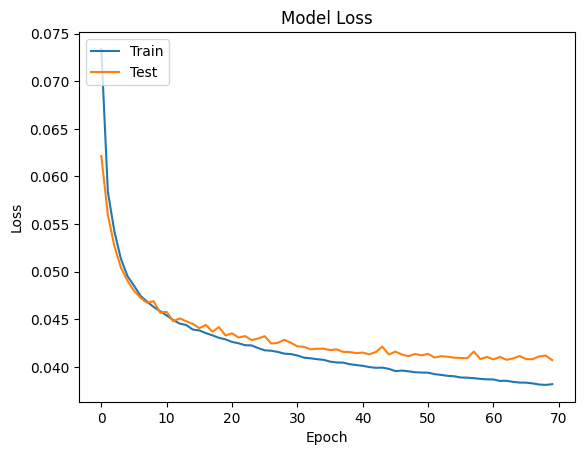

In [33]:

predictions_test2 = autoencoder.predict(augmented_x_test)

# View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


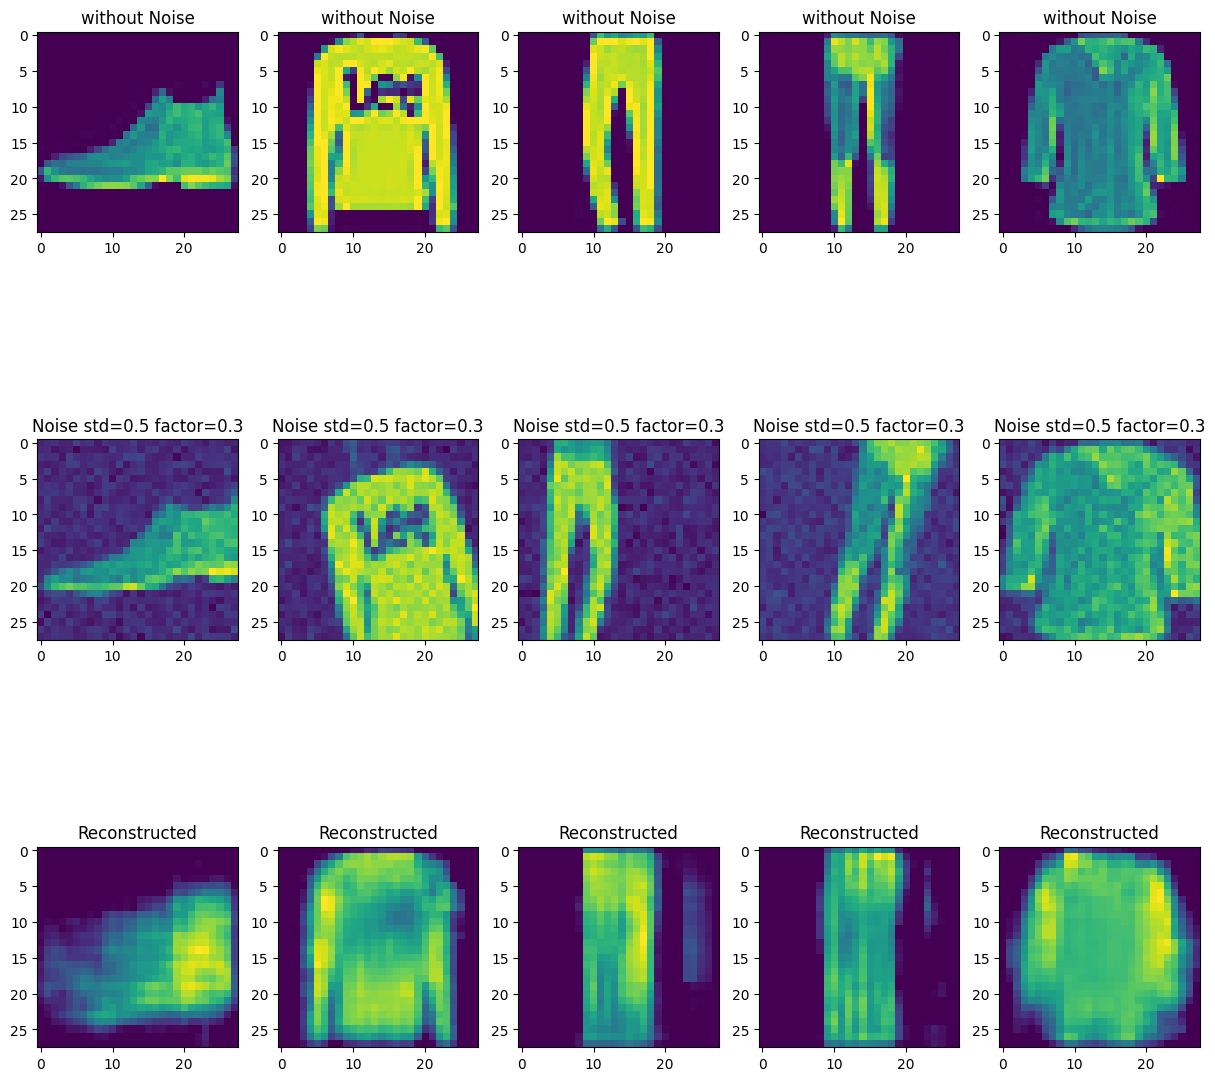

In [34]:

plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(augmented_x_test[i])
    plt.title("Noise std=0.5 factor=0.3")
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title("without Noise")
    plt.subplot(3, 5, i + 11)
    plt.imshow(predictions_test2[i])
    plt.title("Reconstructed")
plt.show()